## Neural Networks

we will be exploring how to use a package called Keras to build our first neural network to predict if house prices are above or below median value.

we will go through the full Deep Learning pipeline, from:


1.   Exploring and Processing the Data
2.   Building and Training our Neural Network

3.   Visualizing Loss and Accuracy
4.   Adding Regularization to our Neural Network















#Exploring the Data

Read Data from csv file  and convert it to array

In [ ]:
import pandas as pd
df = pd.read_csv('/content/data_banknote_authentication (1).csv', index_col=False )

data=df.values
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Split our dataset into the input features and Labels

## Train | Test Split

In [ ]:
import numpy as np
X = data[:,:4]
y = data[:,4]
X, y

(array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
        [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
        [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
        ...,
        [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
        [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
        [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.3)


Now Separate the validation and test data using same function

In [ ]:
X_tr, X_test, Y_tr, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.3)

## **Building and Training our First Neural Network**

#First Step: Setting up the Architecture
Suppose we want this neural network: 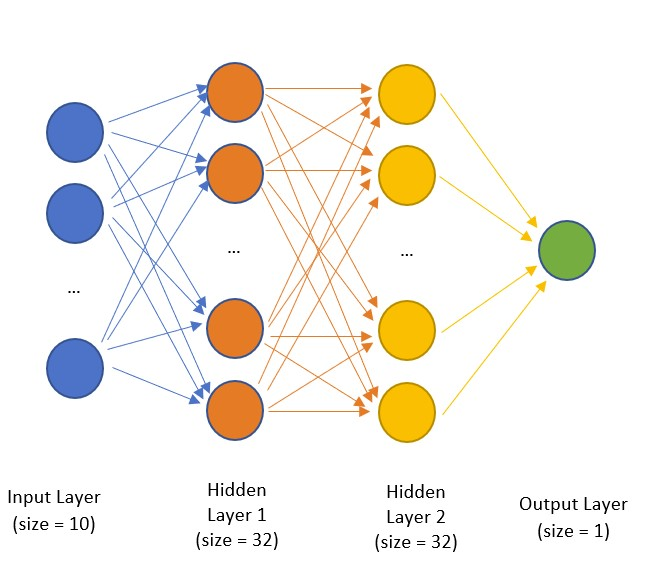

In words, we want to have these layers:


1.  
Hidden layer 1: 32 neurons, ReLU activation
2.   Hidden layer 2: 32 neurons, ReLU activation

3.   Output Layer: 1 neuron, Sigmoid activation



In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(4,)),
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(1, activation='sigmoid', input_shape=(4,)),
])

In [ ]:
import numpy as np
def sig(x):
 return 1/(1 + np.exp(-x))

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, batch_size =32, epochs=100,  validation_data=(X_tr, Y_tr ))

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 0.6394 - accuracy: 0.5823 - val_loss: 0.6098 - val_accuracy: 0.6007
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.6385 - val_loss: 0.5510 - val_accuracy: 0.6910
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7448 - val_loss: 0.5014 - val_accuracy: 0.8681
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8771 - val_loss: 0.4579 - val_accuracy: 0.9201
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.9135 - val_loss: 0.4183 - val_accuracy: 0.9479
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.9469 - val_loss: 0.3817 - val_accuracy: 0.9583
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.9594 - val_loss: 0.3479 - val_accuracy: 0.9618
Epoch 8/100
3

Evaluate the Model

In [ ]:
model.evaluate(X_test, Y_test)[1]

4/4 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9919


0.9919354915618896

Visualizing Loss and Accuracy

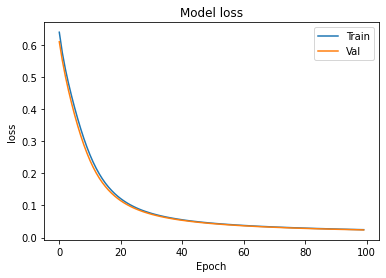

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

ADD Accuracy Plot

In [ ]:

loss_train = hist.history['acc']
loss_val = hist.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
